# Recurrent Neural Network
Numpy implementation of binary addition in RNN.
This code is based on [iamtrask's github.io](https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Generation

Generate the binary array less than 256.

In [2]:
BIN_DIM = 8
INPUT_DIM = 2
HIDDEN_DIM = 16
OUTPUT_DIM = 1

ALPHA = 0.1
ITER_NUM = 10000
LOG_ITER = ITER_NUM // 10
PLOT_ITER = ITER_NUM // 200

In [3]:
largest = pow(2, BIN_DIM)
decimal = np.array([range(largest)]).astype(np.uint8).T
binary = np.unpackbits(decimal, axis=1)

## Prepare weights and deltas
Prepare weight and delta values to use in the optimization process.

In [4]:
# weight values
w0 = np.random.normal(0, 1, [INPUT_DIM, HIDDEN_DIM])
w1 = np.random.normal(0, 1, [HIDDEN_DIM, OUTPUT_DIM])
wh = np.random.normal(0, 2, [HIDDEN_DIM, HIDDEN_DIM])

In [5]:
# delta values
d0 = np.zeros_like(w0)
d1 = np.zeros_like(w1)
dh = np.zeros_like(wh)

In [6]:
errs = list()
accs = list()

error = 0
accuracy = 0

## Training
Training binary addition in RNN with Backpropagation Through Time.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(out):
    return out * (1 - out)

def bin2dec(b):
    out = 0
    for i, x in enumerate(b[::-1]):
        out += x * pow(2, i)
    
    return out

In [8]:
for i in range(ITER_NUM + 1):
    # a + b = c
    a_dec = np.random.randint(largest / 2)
    b_dec = np.random.randint(largest / 2)
    c_dec = a_dec + b_dec
    
    a_bin = binary[a_dec]
    b_bin = binary[b_dec]
    c_bin = binary[c_dec]
    
    pred = np.zeros_like(c_bin)
    
    overall_err = 0 # total error in the whole calculation process.
    
    output_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(HIDDEN_DIM))
    
    future_delta = np.zeros(HIDDEN_DIM)
    
    # forward propagation
    for pos in range(BIN_DIM)[::-1]:
        X = np.array([[a_bin[pos], b_bin[pos]]]) # shape=(1, 2)
        Y = np.array([[c_bin[pos]]]) # shape=(1, 1)
        
        hidden = sigmoid(np.dot(X, w0) + np.dot(hidden_values[-1], wh))
        output = sigmoid(np.dot(hidden, w1))
        
        pred[pos] = np.round(output[0][0])
        
        # squared mean error
        output_err = Y - output
        output_deltas.append(output_err * deriv_sigmoid(output))
        hidden_values.append(hidden)
        
        overall_err += np.abs(output_err[0])
    
    # backpropagation through time
    for pos in range(BIN_DIM):
        X = np.array([[a_bin[pos], b_bin[pos]]])
        
        hidden = hidden_values[-(pos + 1)]
        prev_hidden = hidden_values[-(pos + 2)]
        
        output_delta = output_deltas[-(pos + 1)]
        hidden_delta = (np.dot(future_delta, wh.T) + np.dot(output_delta, w1.T)) * deriv_sigmoid(hidden)
        
        d1 += np.dot(np.atleast_2d(hidden).T, output_delta)
        dh += np.dot(np.atleast_2d(prev_hidden).T, hidden_delta)
        d0 += np.dot(X.T, hidden_delta)

        future_delta = hidden_delta 
    
    w1 += ALPHA * d1
    w0 += ALPHA * d0
    wh += ALPHA * dh
    
    d1 *= 0
    d0 *= 0
    dh *= 0
    
    error += overall_err
    if (bin2dec(pred) == c_dec):
        accuracy += 1
        
    if (i % PLOT_ITER == 0):
        errs.append(error / PLOT_ITER)
        accs.append(accuracy / PLOT_ITER)
        
        error = 0
        accuracy = 0
    
    if (i % LOG_ITER == 0):
        print('Iter', i)
        print("Error :", overall_err)
        print("Pred :", pred)
        print("True :", c_bin)
        print(a_dec, "+", b_dec, "=", bin2dec(pred))
        print('----------')

Iter 0
Error : [ 3.58053173]
Pred : [1 1 0 0 0 0 0 0]
True : [0 1 1 1 0 0 0 1]
56 + 57 = 192
----------
Iter 1000
Error : [ 4.02461631]
Pred : [1 1 1 1 1 0 1 1]
True : [0 0 1 1 0 0 0 1]
2 + 47 = 251
----------
Iter 2000
Error : [ 4.08137761]
Pred : [1 1 1 0 0 0 1 1]
True : [0 1 1 1 1 0 1 0]
7 + 115 = 227
----------
Iter 3000
Error : [ 3.66917756]
Pred : [0 0 0 0 0 0 0 0]
True : [0 1 1 0 1 0 0 0]
69 + 35 = 0
----------
Iter 4000
Error : [ 2.65358694]
Pred : [0 1 0 1 1 0 0 0]
True : [0 1 0 1 1 0 0 0]
24 + 64 = 88
----------
Iter 5000
Error : [ 2.29348929]
Pred : [1 0 0 0 1 1 1 1]
True : [1 0 0 0 1 0 1 1]
104 + 35 = 143
----------
Iter 6000
Error : [ 1.19192799]
Pred : [0 1 1 1 0 1 0 0]
True : [0 1 1 1 0 1 0 0]
67 + 49 = 116
----------
Iter 7000
Error : [ 0.71565016]
Pred : [0 1 0 1 0 1 0 0]
True : [0 1 0 1 0 1 0 0]
80 + 4 = 84
----------
Iter 8000
Error : [ 0.6265688]
Pred : [0 1 1 0 0 0 0 1]
True : [0 1 1 0 0 0 0 1]
88 + 9 = 97
----------
Iter 9000
Error : [ 0.68126419]
Pred : [1 0 1 0 

## Plot learning curve
Plot error and accuracy.

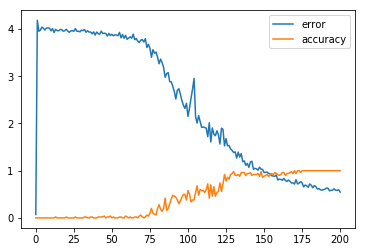

In [9]:
plt.plot(errs, label='error')
plt.plot(accs, label='accuracy')
plt.legend()